In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Displaying Uninfected and Infected Cell tissues

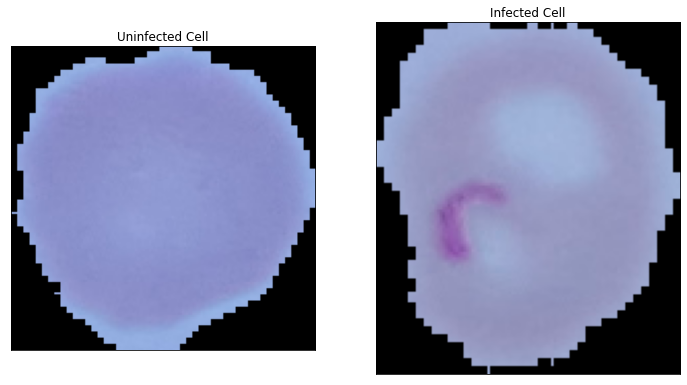

In [16]:
import cv2

parasitized=r'C:\Users\Shubhendu Mishra\Desktop\DSM\Projects\Malaria\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_110435_cell_94.png'
uninfected=r'C:\Users\Shubhendu Mishra\Desktop\DSM\Projects\Malaria\cell_images\Uninfected\C4thin_original_IMG_20150608_165908_cell_191.png'
plt.figure(1, figsize = (12,8 ))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(uninfected))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(parasitized))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [17]:
width = 128
height = 128

# Dividing Dataset into two folders train and test

In [18]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

# Preparing train and test Image Generator

In [19]:
trainDatagen = datagen.flow_from_directory(directory=r'C:\Users\Shubhendu Mishra\Desktop\DSM\Projects\Malaria\cell_images\cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [20]:
valDatagen = datagen.flow_from_directory(directory=r'C:\Users\Shubhendu Mishra\Desktop\DSM\Projects\Malaria\cell_images\cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


# Preparing the model¶

In [21]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [25]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =20,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                             callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1378 steps, validate for 345 steps
Epoch 1/20
1378/1378 [==============================] - 499s 362ms/step - loss: 0.5300 - accuracy: 0.7412 - val_loss: 0.2854 - val_accuracy: 0.9211
Epoch 2/20
1378/1378 [==============================] - 279s 203ms/step - loss: 0.2105 - accuracy: 0.9331 - val_loss: 0.1789 - val_accuracy: 0.9309
Epoch 3/20
1378/1378 [==============================] - 280s 203ms/step - loss: 0.1679 - accuracy: 0.9438 - val_loss: 0.1628 - val_accuracy: 0.9356
Epoch 4/20
1378/1378 [==============================] - 280s 203ms/step - loss: 0.1582 - accuracy: 0.9516 - val_loss: 0.1602 - val_accuracy: 0.9417
Epoch 5/20
1378/1378 [==============================] - 283s 205ms/step - loss: 0.1480 - accuracy: 0.9532 - val_loss: 0.1658 - val_accuracy: 0.9417
Epoch 6/20
1378/1378 [==============================] - 279s 202ms/step - loss: 0.1430 - 

# Plots

In [33]:
def plotLearningCurve(history,epochs):
    epochRange = range(1,epochs+1)
    plt.plot(epochRange,history.history['accuracy'])
    plt.plot(epochRange,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train','Validation'])
    plt.show()

    plt.plot(epochRange,history.history['loss'])
    plt.plot(epochRange,history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train','Validation'])
    plt.show()

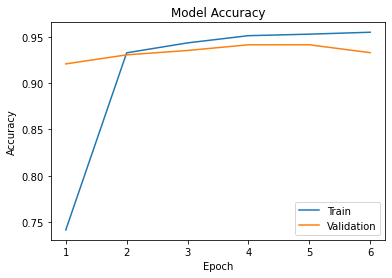

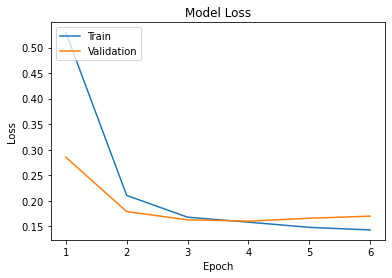

In [32]:
plotLearningCurve(history,6)